# The Dataset

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
np.random.seed(123)
rand_state = 2314

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


In [6]:
# A function plotting an image from the Fashion MNIST dataset with its corresposnding label
# img_data: an array of images/2D matrices (X)
# label_ids: an array of labels from 0 to 9 matching in order to the images array (y)
# index: array index of the image to be plotted
def plot_fashion_label(img_data, label_ids, index):
    labels = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 
              'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.imshow(img_data[index], cmap='gray')
    plt.title(labels[label_ids[index]])
    return labels[label_ids[index]]

'Bag'

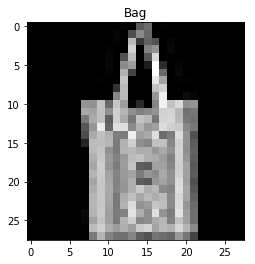

In [12]:
# test plot
plot_fashion_label(X_train, y_train, index=np.random.randint(0,100))

# A first neural network

In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from keras.optimizers import SGD

np.random.seed(123)
rand_state = 2314

def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

def plot_decision_boundary(clf, X, y, title=None, loss=None, figw=16, figh=8):
    h = .1  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    xx.shape
    
    ncols = 1
    if loss is not None:
        ncols = 2
    fig, ax = plt.subplots(figsize=(figw, figh), ncols=ncols)
    
    if ncols == 1:
        Z = Z[:,1].reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.PuOr)
        ax.scatter(X[:, 0], X[:, 1], c=y[:,1], cmap=plt.cm.PuOr)
        if title is not None:
            ax.set_title(title)
    else :
        # Put the result into a color plot
        Z = Z[:,1].reshape(xx.shape)
        ax[0].contourf(xx, yy, Z, cmap=plt.cm.PuOr)
        ax[0].scatter(X[:, 0], X[:, 1], c=y[:,1], cmap=plt.cm.PuOr)
        if title is not None:
            ax[0].set_title(title)
    
        if loss is not None:
            ax[1].plot(loss, c='tab:orange')
            ax[1].set_title("Loss function at the end of each epoch")
            ax[1].set_ylabel("Loss")
            ax[1].set_xlabel("Epoch")
#     return ax

        
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


- ### Sample with 2 classes

In [14]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=123)
split = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, test_size=1-split, random_state=rand_state)

# plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
#             s=50, cmap=plt.cm.PuOr)

Model Loss: 0.138,    Model Accuracy: 0.950


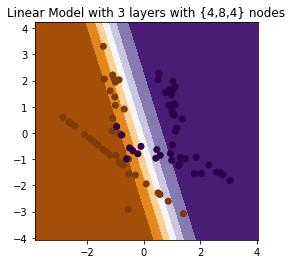

In [15]:
np.random.seed(123+3)

Y_train_ = one_hot(2, y_train)
Y_test_ = one_hot(2, y_test)


# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# Build a NN with 3 layers with {4,8,4} nodes each
x1 = Dense(4)(inputs)
x2 = Dense(8)(x1)
x3 = Dense(4)(x2)

# Merge results into a final layer with dimension 2 matching the number of output classes
predictions = Dense(2, activation='softmax')(x3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])
model.fit(X_train, Y_train_, epochs=100, verbose=False)
loss, acc = model.evaluate(X_test, Y_test_, verbose=0)
print('Model Loss: {:0.3f},    Model Accuracy: {:0.3f}'.format(loss, acc))
plot_decision_boundary(model, X_train, Y_train_, title='Linear Model with 3 layers with {4,8,4} nodes', figw=4, figh=4)

Model Loss: 0.102,    Model Accuracy: 0.95000


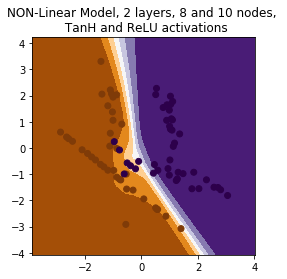

In [16]:
# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# Build a NN with 2 layers with 8 nodes each
x1 = Dense(8)(inputs)        # a dense layer with 8 nodes
x1 = Activation("tanh")(x1)  # apply activation functoion on the outputs from the previous layer
x1 = Dropout(0.2)(x1)        # set outputs after activation to zero if their value is less than the threshold (0.2)
x2 = Dense(10)(x1)           # add a new layer with 10 nodes using the leftovers from the prevoius layers
x2 = Activation("relu")(x2)  # repeat activation and cutoff of results
x2 = Dropout(0.2)(x2)        # repeat activation and cutoff of results

# Merge results into a final layer with dimension 2 matching the number of output classes
predictions = Dense(2, activation='softmax')(x2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])
model.fit(X_train, Y_train_, epochs=100, verbose=False)
loss, acc = model.evaluate(X_test, Y_test_, verbose=0)
print('Model Loss: {:0.3f},    Model Accuracy: {:0.5f}'.format(loss, acc))
plot_decision_boundary(model, X_train, Y_train_, 
                       title='NON-Linear Model, 2 layers, 8 and 10 nodes, \n TanH and ReLU activations',
                      figw=4, figh=4)

Due to the complex structure of the data, in order to classify it better, the layers in the network should include nonlinear relation between the input parameters. To achieve this one needs to use nonlinear activation functions. In order to avoid overfitting, a Dropout condition is added as well on some layers.

- ### Circles

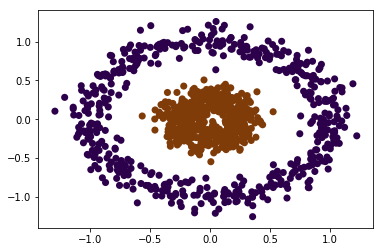

In [17]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, factor=.25, noise=.1)
labels = [0, 1]
y = np.take(labels, (y < 0.5))

split = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, test_size=1-split, random_state=rand_state)
Y_train_ = one_hot(2, y_train)
Y_test_ = one_hot(2, y_test)

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=50, cmap=plt.cm.PuOr)


In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
rand_state = 2314

from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))


In [19]:
from widgets import *
def NN_model(activation='tanh', predict_activation='softmax', 
             input_dim=2, output_dim=2, n_layers=2, layers_nodes=[4], 
             loss_func='categorical_crossentropy', metric='accuracy', 
             cutoff=0.2):
    
    if len(layers_nodes) < n_layers :
        nodes = [None]*n_layers
        for layer in range(n_layers) :
            nodes[layer] = layers_nodes[0]
    else :
        nodes = layers_nodes
 
    inputs = Input(shape=(input_dim,))
    
    x = Dense(nodes[layer])(inputs)
    x = Activation(activation)(x)  
    x = Dropout(cutoff)(x)  
    for layer in range(1, n_layers):
        x = Dense(nodes[layer])(x)
        x = Activation(activation)(x)  
        x = Dropout(cutoff)(x)  
        
    predictions = Dense(output_dim, activation=predict_activation)(x)
    
    model = Model(inputs=inputs, outputs=predictions)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=loss_func,
                  optimizer=sgd,
                  metrics=[metric])
    return model
    
def run_NN(act, n_layers, n_nodes, cutoff, n_epochs, X_train, Y_train_, X_test, Y_test_) :
    model = NN_model(activation=act.value,
                     n_layers=n_layers.value,
                     layers_nodes=[n_nodes.value],
                     cutoff=cutoff.value)
    loss_a = []
    for epoch in range(n_epochs.value) :
        history = LossHistory()
        model.fit(X_train, Y_train_, 
                  epochs=1, verbose=False, callbacks=[history],
                  validation_data=(X_test, Y_test_))
        if epoch % 10 == 0 :
            loss, acc = model.evaluate(X_test, Y_test_, verbose=0)
        loss_a.append(history.losses)
    
    loss_a = np.array(loss_a) 
    loss, acc = model.evaluate(X_test, Y_test_, verbose=0)
    plot_decision_boundary(model, X_train, Y_train_, 
                           title='Model with {:} layers and {:} nodes/layer, \n Activation: {}'.format(n_layers.value, n_nodes.value, act.value),
                           loss=loss_a, figw=12, figh=4)
    print('Activation: {} \n      Model Loss: {:0.3f},    Model Accuracy: {:0.5f}'.format(act.value, loss, acc))
    
def on_button_circ_clicked(b):
    run_NN(act=w_activation, n_layers=w_n_layers, n_nodes=w_n_nodes, cutoff=w_cutoff, n_epochs=w_n_epochs,
          X_train=X_train, Y_train_=Y_train_, X_test=X_test, Y_test_=Y_test_)
button_circ.on_click(on_button_circ_clicked)

Activation: tanh 
      Model Loss: 0.395,    Model Accuracy: 0.83500


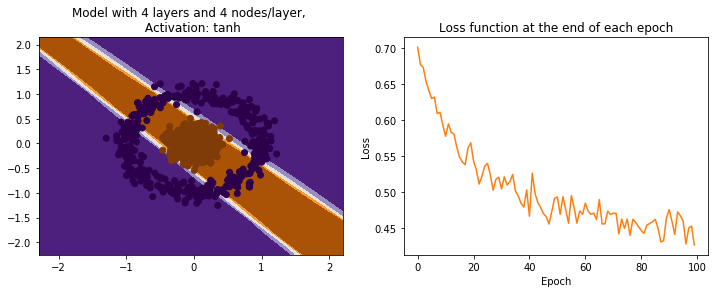

Activation: relu 
      Model Loss: 0.087,    Model Accuracy: 1.00000


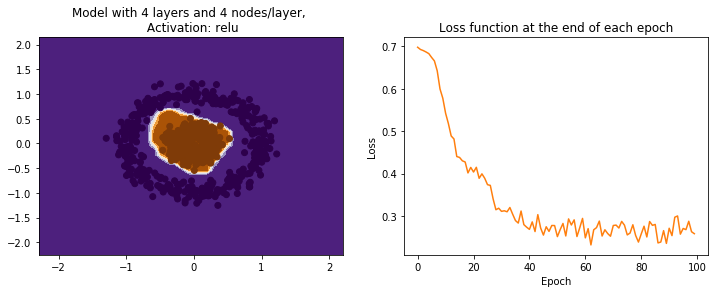

Activation: softmax 
      Model Loss: 0.693,    Model Accuracy: 0.50500


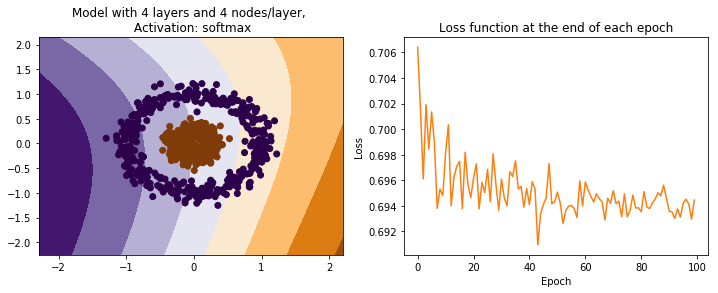

Activation: tanh 
      Model Loss: 0.004,    Model Accuracy: 1.00000


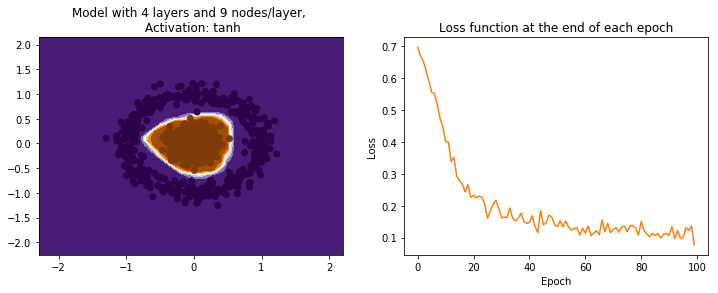

In [20]:
display(vbox, button_circ)

The interactive tab allows experimentation with three activation functions and variable number of dense layers with. Results from previous runs are kept until the cell is restarted.

# Fashion neural network

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
rand_state = 2314

from keras.layers import Input, Dense, Activation, Flatten, Dropout, Conv1D
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from keras import utils
from keras.datasets import fashion_mnist
import widgets

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

num_classes = 10
Y_train_ = utils.to_categorical(y_train, num_classes)
Y_val_ = utils.to_categorical(y_val, num_classes)
Y_test_ = utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [2]:
from widgets import *

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

def Fashion_model(activation='tanh', predict_activation='softmax', 
             input_dim=28, output_dim=10, n_layers=2, layers_nodes=[4], 
             loss_func='categorical_crossentropy', metric='accuracy', 
             cutoff=0.2):
    
    if len(layers_nodes) < n_layers :
        nodes = [None]*n_layers
        for layer in range(n_layers) :
            nodes[layer] = layers_nodes[0]
    else :
        nodes = layers_nodes
 
    inputs = Input(shape=(input_dim, input_dim,))
    # turn a 28x28 matrix into a 784-d vector, this removes all information
    # about the spatial relation between pixels. Using convolutions will
    # allow us to take advantage of that information (see later)
    x = Flatten()(inputs)
    print(x.shape)
    
    x = Dense(nodes[layer])(x)
    x = Activation(activation)(x)  
    x = Dropout(cutoff)(x)  
    for layer in range(1, n_layers):
        x = Dense(nodes[layer])(x)
        x = Activation(activation)(x)  
        x = Dropout(cutoff)(x)  
        
    x = Dense(10)(x)
    predictions = Activation('softmax')(x)
    
    model = Model(inputs=inputs, outputs=predictions)
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=loss_func,
                  optimizer=sgd,
                  metrics=[metric])
#     print(model.summary())
    return model

def run_Fashion(act, n_layers, n_nodes, cutoff, n_epochs, X_train, Y_train_, X_test, Y_test_) :
    model = Fashion_model(activation=act.value,
                          n_layers=n_layers.value,
                          layers_nodes=[n_nodes.value],
                          cutoff=cutoff.value)
    loss_a = []
    batch_size = 128
    for epoch in range(n_epochs.value) :
        history = LossHistory()
        if epoch % 50 == 0 :
            model.fit(X_train, Y_train_, 
                      batch_size=batch_size,
                      epochs=1, verbose=True,
                      callbacks=[history],
                      validation_data=(X_test, Y_test_))
        else :
            model.fit(X_train, Y_train_, 
                      batch_size=batch_size,
                      epochs=1, verbose=False, 
                      callbacks=[history],
                      validation_data=(X_test, Y_test_))
        loss_a.append(history.losses)
    
    loss_a = np.array(loss_a) 
    loss, acc = model.evaluate(X_test, Y_test_, verbose=0)
    print('Activation: {} ; N Layers: {:d} ; N Nodes/Layer: {:d} \n'.format(act.value, n_layers.value, n_nodes.value),
          '  Model Loss: {:0.3f},    Model Accuracy: {:0.5f}'.format(loss, acc))
    plt.plot(loss_a, c='tab:orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')


    
def on_button_fashion_clicked(b):
    run_Fashion(act=w_activation, n_layers=w_n_layers, n_nodes=w_n_nodes, cutoff=w_cutoff, n_epochs=w_n_epochs,
          X_train=X_train, Y_train_=Y_train_, X_test=X_val, Y_test_=Y_val_)
button_fashion.on_click(on_button_fashion_clicked)

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 2s 40us/step - loss: 1.4355 - acc: 0.4515 - val_loss: 0.7378 - val_acc: 0.7001
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 2s 31us/step - loss: 0.3452 - acc: 0.8810 - val_loss: 0.3578 - val_acc: 0.8768
Activation: relu ; N Layers: 6 ; N Nodes/Layer: 60 
   Model Loss: 0.354,    Model Accuracy: 0.88040


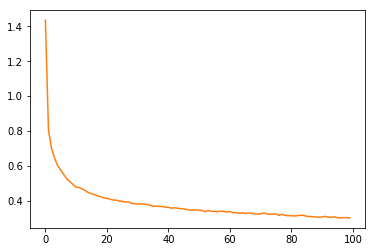

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 5s 92us/step - loss: 2.1546 - acc: 0.1637 - val_loss: 1.7580 - val_acc: 0.2713
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 62us/step - loss: 14.5044 - acc: 0.1001 - val_loss: 14.5111 - val_acc: 0.0997
Activation: relu ; N Layers: 20 ; N Nodes/Layer: 60 
   Model Loss: nan,    Model Accuracy: 0.10090


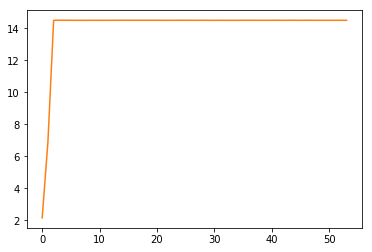

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 53us/step - loss: 2.1253 - acc: 0.1595 - val_loss: 1.7232 - val_acc: 0.2815
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 1s 27us/step - loss: 1.4003 - acc: 0.3939 - val_loss: 1.7944 - val_acc: 0.2161
Activation: relu ; N Layers: 10 ; N Nodes/Layer: 10 
   Model Loss: 1.623,    Model Accuracy: 0.27740


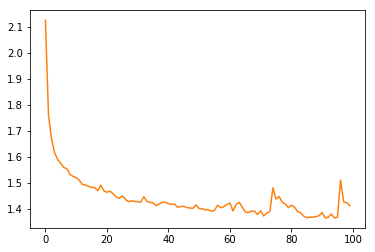

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 66us/step - loss: 1.2885 - acc: 0.4948 - val_loss: 0.6672 - val_acc: 0.7239
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 54us/step - loss: 0.2768 - acc: 0.9017 - val_loss: 0.3333 - val_acc: 0.8845
Activation: relu ; N Layers: 6 ; N Nodes/Layer: 100 
   Model Loss: 0.350,    Model Accuracy: 0.88500


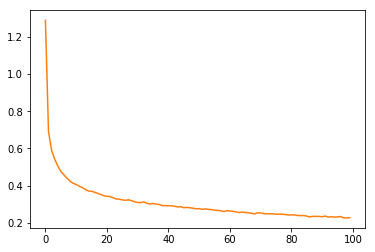

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 4s 89us/step - loss: 2.3029 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1008
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 66us/step - loss: 2.3028 - acc: 0.1001 - val_loss: 2.3028 - val_acc: 0.0947
Activation: softmax ; N Layers: 6 ; N Nodes/Layer: 100 
   Model Loss: 2.303,    Model Accuracy: 0.10080


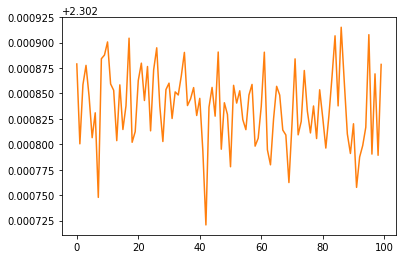

(?, ?)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 3s 52us/step - loss: 0.8915 - acc: 0.6714 - val_loss: 0.5300 - val_acc: 0.8066
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 2s 33us/step - loss: 0.3540 - acc: 0.8778 - val_loss: 0.3670 - val_acc: 0.8746
Activation: tanh ; N Layers: 6 ; N Nodes/Layer: 60 
   Model Loss: 0.359,    Model Accuracy: 0.88210


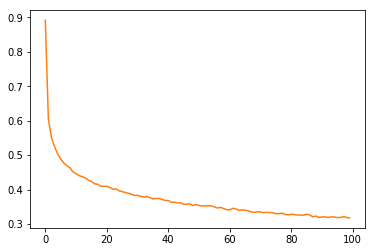

In [3]:
display(vbox, button_fashion)

- Activation: relu ; N Layers: 6 ; N Nodes/Layer: 60 
   Model Loss: 0.354,    Model Accuracy: 0.88040
 
- Activation: relu ; N Layers: 20 ; N Nodes/Layer: 60 
   Model Loss: nan,    Model Accuracy: 0.10090
   
- Activation: relu ; N Layers: 10 ; N Nodes/Layer: 10 
   Model Loss: 1.623,    Model Accuracy: 0.27740
   
- Activation: relu ; N Layers: 6 ; N Nodes/Layer: 100 
   Model Loss: 0.350,    Model Accuracy: 0.88500

- Activation: softmax ; N Layers: 6 ; N Nodes/Layer: 100 
   Model Loss: 2.303,    Model Accuracy: 0.10080
   
- Activation: tanh ; N Layers: 6 ; N Nodes/Layer: 60 
   Model Loss: 0.359,    Model Accuracy: 0.88210
        
 ** Conclusion: ** Having more dense layers seems to worsen the performance of the NN model. On the other hand, larger number of nodes per layers seem to be benefitial up to a certain point e.g. there is little difference between having 60 and 100 nodes per layer. The best accuracy is in the order of 90 %. Longer training might improve by a couple of percent the accuracy, but at this point the required time is not worth the gain.